# Banff Parking - Data Cleaning and Preprocessing for Machine Learning

**Group: Mobility Innovators**

**Group Members:**
- Aquiles Escarra
- Inderjeet Singh
- Aditya Mehta
- Yungvir Singh


**Main Goal on these Data Cleaning and Preprocess:**

The main objective of this EDA is to explore and understand the structure, quality, and behavior of the parking dataset before modeling.
Through descriptive statistics and visualization, we aim to identify occupancy trends, detect missing or inconsistent values, and uncover temporal and behavioral patterns across different parking lots in Banff.

This stage helps reveal how key factors such as hour of the day, day of the week, and type of transaction (e.g., parking vs. extension) influence overall occupancy and revenue.
The insights obtained here provide the foundation for building predictive models and for understanding how parking dynamics relate to urban mobility and traffic flow.

## Importing Required Libraries & Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1: Load and Combine Parking Datasets

All uploaded CSV files (January 2024 - August 2025) were manually loaded into individual DataFrames


In [ ]:
# Load datasets
df_1  = pd.read_csv("janfeb24.csv")
df_2  = pd.read_csv("Maraprmay24.csv")
df_3  = pd.read_csv("jun25.csv")
df_4  = pd.read_csv("jul25.csv")
df_5  = pd.read_csv("aug24.csv")
df_6  = pd.read_csv("aug 25.csv")
df_7  = pd.read_csv("sepoct24.csv")
df_8  = pd.read_csv("nov24.csv")
df_9  = pd.read_csv("decjanfeb25.csv")
df_10 = pd.read_csv("mar25.csv")
df_11 = pd.read_csv("aprmay25.csv")

# Store in list for easier iteration
dfs = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11]

names = ["janfeb24", "Maraprmay24", "jun25", "jul25", "aug24", "aug 25",
         "sepoct24", "nov24", "decjanfeb25", "mar25", "aprmay25"]

In [ ]:
# 🔍 Validate structure and column consistency
print(" Checking structure of all datasets...\n")
for name, df in zip(names, dfs):
    print(f" Dataset: {name}")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("Columns:", list(df.columns))
    print(df.dtypes)
    print("-" * 80)

 Checking structure of all datasets...

 Dataset: janfeb24
Rows: 84721, Columns: 15
Columns: ['Fee', 'Date', 'Starting date', 'End date', 'Payment type', 'Amount', 'Plate', 'Type', 'Hope Gps Latitude', 'Hope Gps Longitude', 'Unit', 'Time', 'PT1 amount', 'Amount with bonification', 'Zone']
Fee                          object
Date                         object
Starting date                object
End date                     object
Payment type                 object
Amount                       object
Plate                        object
Type                         object
Hope Gps Latitude           float64
Hope Gps Longitude          float64
Unit                         object
Time                          int64
PT1 amount                   object
Amount with bonification     object
Zone                         object
dtype: object
--------------------------------------------------------------------------------
 Dataset: Maraprmay24
Rows: 157392, Columns: 15
Columns: ['Fee', 'Date', 'S

## Standardize and Clean Columns

In [ ]:

dfs_cleaned = []

for i, (df, name) in enumerate(zip(dfs, names), start=1):
    print(f"Cleaning dataset: {name}")

    # --- Normalize column names ---
    df.columns = (
        df.columns.str.strip()
                  .str.replace(" ", "_")
                  .str.lower()
    )

    # --- Check expected columns ---
    expected_cols = [
        "fee", "date", "starting_date", "end_date", "payment_type",
        "amount", "plate", "type", "hope_gps_latitude", "hope_gps_longitude",
        "unit", "time", "pt1_amount", "amount_with_bonification", "zone"
    ]
    missing_cols = [c for c in expected_cols if c not in df.columns]
    if missing_cols:
        print(f" Missing columns in {name}: {missing_cols}")
    else:
        print(" All expected columns found.")

    # --- Convert date columns ---
    for col in ["date", "starting_date", "end_date"]:
        df[col] = pd.to_datetime(df[col], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")

    # --- Clean and convert monetary fields ---
    for col in ["amount", "pt1_amount", "amount_with_bonification"]:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(r"[^0-9.]", "", regex=True)
            .replace("", np.nan)
            .astype(float)
        )

    # --- Standardize unit names ---
    df["unit"] = df["unit"].astype(str).str.strip().str.upper()

    # Replace based on payment type or wrong unit label
    df.loc[df["payment_type"].str.lower() == "pay by phone", "unit"] = "BANFF100-APP"

    # --- Check number of rows before cleaning nulls ---
    before_drop = df.shape[0]
    print(f"   📊 Rows before dropna: {before_drop}")

    # --- Remove invalid or reversed time ranges ---
    df = df.dropna(subset=["starting_date", "end_date"])
    df = df[df["end_date"] >= df["starting_date"]]

    after_drop = df.shape[0]
    removed_rows = before_drop - after_drop
    print(f"   🧽 Rows after dropna: {after_drop} (removed {removed_rows} rows with missing/reversed dates)")

    # --- Sort by starting date ---
    df = df.sort_values("starting_date").reset_index(drop=True)

    # --- Append cleaned DataFrame ---
    dfs_cleaned.append(df)
    print(f" Cleaned: {name} — Rows: {df.shape[0]}\n{'-'*80}")

#  Combine all cleaned DataFrames
df_parking_prep = pd.concat(dfs_cleaned, ignore_index=True)

#  Final structure check
print("\n Combined and cleaned dataset successfully created.")
print("Shape:", df_parking_prep.shape)
print("Columns:", df_parking_prep.columns.tolist())
df_parking_prep.head(5)


Cleaning dataset: janfeb24
 All expected columns found.
   📊 Rows before dropna: 84721
   🧽 Rows after dropna: 84719 (removed 2 rows with missing/reversed dates)
 Cleaned: janfeb24 — Rows: 84719
--------------------------------------------------------------------------------
Cleaning dataset: Maraprmay24
 All expected columns found.
   📊 Rows before dropna: 157392
   🧽 Rows after dropna: 157385 (removed 7 rows with missing/reversed dates)
 Cleaned: Maraprmay24 — Rows: 157385
--------------------------------------------------------------------------------
Cleaning dataset: jun25
 All expected columns found.
   📊 Rows before dropna: 74613
   🧽 Rows after dropna: 74596 (removed 17 rows with missing/reversed dates)
 Cleaned: jun25 — Rows: 74596
--------------------------------------------------------------------------------
Cleaning dataset: jul25
 All expected columns found.
   📊 Rows before dropna: 86432
   🧽 Rows after dropna: 86398 (removed 34 rows with missing/reversed dates)
 Cleaned

,fee,date,starting_date,end_date,payment_type,amount,plate,type,hope_gps_latitude,hope_gps_longitude,unit,time,pt1_amount,amount_with_bonification,zone
0,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,NaN,NaN,BANFF100-APP,720,48.0,48.0,Downtown
1,Regular Rate,2024-01-01 07:57:11,2024-01-01 08:00:00,2024-01-01 14:00:00,Bank card,24.0,CPM9802,Parking,51.176,-115.573,BANFF20- LYNX 100 BLOCK,360,24.0,NaN,Downtown
2,Residents Rate,2024-01-01 07:59:01,2024-01-01 08:00:00,2024-01-01 11:00:00,Pay by phone,0.0,CPL1393,Parking,NaN,NaN,BANFF100-APP,180,0.0,0.0,Downtown
3,Regular Rate,2024-01-01 07:56:32,2024-01-01 08:00:00,2024-01-01 10:00:00,Pay by phone,8.0,509,Parking,NaN,NaN,BANFF100-APP,120,8.0,8.0,Downtown
4,Regular Rate,2024-01-01 06:29:32,2024-01-01 08:00:00,2024-01-01 10:00:00,Pay by phone,8.0,CLH9650,Parking,NaN,NaN,BANFF100-APP,120,8.0,8.0,Downtown


Parking lot inspection  

In [ ]:
df_parking_prep["unit"].unique()

array(['BANFF100-APP', 'BANFF20- LYNX 100 BLOCK',
       'BANFF01- HEALTH UNIT LOT', 'BANFF19- BEAR STREET PARKADE',
       'BANFF14- MT ROYAL LOT 1 "EAST"', 'BANFF15- CLOCK TOWER LOT',
       'BANFF22- WOLF AT ALLEY', 'BANFF21- LYNX 200 BLOCK',
       'BANFF10- CARIBOU FIRE HALL', 'BANFF12- CARIBOU MASONS',
       'BANFF17- CENTRAL PARK LOT', 'BANFF26- FIRE HALL LOT WEST',
       'BANFF13- MT ROYAL LOT 1 "WEST"', 'BANFF16- BUFFALO AND BANFF',
       'BANFF07- WOLF HIGH SCHOOL', 'BANFF06- ELK STREET IGA',
       'BANFF05- CLOCK TOWER LOT WEST', 'BANFF24- CENTRAL PARK LOT SOUTH',
       'BANFF18- TOWN HALL LOT', 'BANFF11- BEAR ST LOT',
       'BANFF23- WOLF 300 SOUTH', 'BANFF02- WOLF AT MARTEN',
       'BANFF25- TOWN HALL LOT NORTH', 'BANFF03- PLAZA PARKADE',
       'BANFF04- MARTEN 300 BLOCK', 'BANFF08- FIRE HALL LOT 1 "WEST"',
       'BANFF09- FIRE HALL LOT "EAST"', 'BANFF27- BEAR PARKADE L1',
       'BANFF28- BEAR PARKADE L2', 'BANFF99V- VIRTUAL', 'BANFF99- TEST'],
      dtype=object

In [ ]:
iloc_banff99_test = df_parking_prep[df_parking_prep["unit"] == "BANFF99- TEST"].index

In [ ]:
iloc_banff99_virtual = df_parking_prep[df_parking_prep["unit"] == "BANFF99V- VIRTUAL"].index

In [ ]:
print(df_parking_prep[df_parking_prep["unit"] == "BANFF99- TEST"].index)

Index([851597, 851604, 851629, 859342, 859355, 957197, 957378, 960021], dtype='int64')


In [ ]:
print(iloc_banff99_virtual)

Index([225877, 703791, 704180, 726717, 726811, 726817, 958585, 958586], dtype='int64')


In [ ]:
df_parking_prep[df_parking_prep["unit"] == "BANFF99- TEST"]

,fee,date,starting_date,end_date,payment_type,amount,plate,type,hope_gps_latitude,hope_gps_longitude,unit,time,pt1_amount,amount_with_bonification,zone
851597,Regular Rate,2025-02-07 08:39:46,2025-02-07 08:39:46,2025-02-07 09:09:00,Bank card,2.5,TEST,Parking,51.175,-115.572,BANFF99- TEST,30,2.5,NaN,Downtown
851604,Regular Rate,2025-02-07 08:51:32,2025-02-07 08:51:32,2025-02-07 09:21:00,Cash,2.5,TEST1,Parking,51.175,-115.572,BANFF99- TEST,30,2.5,NaN,Downtown
851629,Regular Rate,2025-02-07 08:43:38,2025-02-07 09:09:00,2025-02-07 20:00:00,Cash,54.0,TEST,Extension,51.175,-115.572,BANFF99- TEST,651,54.0,NaN,Downtown
859342,Regular Rate,2025-02-13 12:30:55,2025-02-13 12:30:55,2025-02-13 13:00:00,Cash,3.5,TEST011,Parking,51.175,-115.572,BANFF99- TEST,30,3.5,NaN,Downtown
859355,Regular Rate,2025-02-13 12:35:51,2025-02-13 12:35:51,2025-02-13 13:05:00,Bank card,3.5,TEST1,Parking,51.175,-115.572,BANFF99- TEST,30,3.5,NaN,Downtown
957197,Regular Rate,2025-04-14 09:07:35,2025-04-14 09:07:35,2025-04-14 09:37:00,Cash,3.5,TEST,Parking,51.175,-115.572,BANFF99- TEST,30,3.5,NaN,Downtown
957378,Regular Rate,2025-04-14 10:59:55,2025-04-14 10:59:55,2025-04-14 11:29:00,Bank card,3.5,TEST12,Parking,51.175,-115.572,BANFF99- TEST,30,3.5,NaN,Downtown
960021,Regular Rate,2025-04-16 09:13:51,2025-04-16 09:13:51,2025-04-16 09:43:00,Bank card,3.5,TEST1,Parking,51.175,-115.572,BANFF99- TEST,30,3.5,NaN,Downtown


In [ ]:
df_parking_prep[df_parking_prep["unit"] == "BANFF99V- VIRTUAL"]

,fee,date,starting_date,end_date,payment_type,amount,plate,type,hope_gps_latitude,hope_gps_longitude,unit,time,pt1_amount,amount_with_bonification,zone
225877,Regular Rate,2024-05-24 10:07:44,2024-05-24 10:07:44,2024-05-24 10:37:00,Bank card,3.00,TM094N,Parking,NaN,NaN,BANFF99V- VIRTUAL,30,3.00,NaN,Downtown
703791,Regular Rate,2024-11-01 12:12:42,2024-11-01 12:12:42,2024-11-01 12:42:00,Bank card,2.50,444,Parking,NaN,NaN,BANFF99V- VIRTUAL,30,2.50,NaN,Downtown
704180,Regular Rate,2024-11-01 16:10:29,2024-11-01 16:10:29,2024-11-01 18:40:00,Bank card,12.50,333,Parking,NaN,NaN,BANFF99V- VIRTUAL,150,12.50,NaN,Downtown
726717,Regular Rate,2024-11-15 10:21:09,2024-11-15 10:21:09,2024-11-15 10:51:00,Bank card,2.50,DDD,Parking,NaN,NaN,BANFF99V- VIRTUAL,30,2.50,NaN,Downtown
726811,Regular Rate,2024-11-15 11:06:13,2024-11-15 11:06:13,2024-11-15 11:36:00,Bank card,2.50,RRRR,Parking,NaN,NaN,BANFF99V- VIRTUAL,30,2.50,NaN,Downtown
726817,Regular Rate,2024-11-15 11:07:35,2024-11-15 11:07:35,2024-11-15 11:37:00,Bank card,2.50,766,Parking,NaN,NaN,BANFF99V- VIRTUAL,30,2.50,NaN,Downtown
958585,Regular Rate,2025-04-15 07:56:47,2025-04-15 08:00:00,2025-04-15 08:30:00,Cash,4.25,TESTHK,Parking,NaN,NaN,BANFF99V- VIRTUAL,30,4.25,NaN,Downtown
958586,Regular Rate,2025-04-15 07:58:55,2025-04-15 08:00:00,2025-04-15 08:30:00,Cash,4.00,TESTHK1,Parking,NaN,NaN,BANFF99V- VIRTUAL,30,4.00,NaN,Downtown


Some parking records correspond to internal test or virtual entries used by the system, specifically labeled as "BANFF99V- VIRTUAL" and "BANFF99- TEST".
These records do not represent real parking transactions and should be removed from the dataset to ensure analytical accuracy.

In [ ]:
# Define invalid test units
invalid_units = ["BANFF99V- VIRTUAL", "BANFF99- TEST"]

# Check how many test records exist before removal
test_count = df_parking_prep[df_parking_prep["unit"].isin(invalid_units)].shape[0]
print(f"Found {test_count} test/virtual records to remove.")

# Remove them from the dataset
df_parking_prep = df_parking_prep[~df_parking_prep["unit"].isin(invalid_units)].reset_index(drop=True)

# Verify removal
remaining_count = df_parking_prep[df_parking_prep["unit"].isin(invalid_units)].shape[0]
print(f"✅ Test/virtual records successfully removed. Remaining: {remaining_count}")
print("Updated shape:", df_parking_prep.shape)

Found 16 test/virtual records to remove.
✅ Test/virtual records successfully removed. Remaining: 0
Updated shape: (1051154, 15)


In [ ]:
print(df_parking_prep["unit"].unique())

print("\nNumber of parking lots: ", len(df_parking_prep["unit"].unique()))

['BANFF100-APP' 'BANFF20- LYNX 100 BLOCK' 'BANFF01- HEALTH UNIT LOT'
 'BANFF19- BEAR STREET PARKADE' 'BANFF14- MT ROYAL LOT 1 "EAST"'
 'BANFF15- CLOCK TOWER LOT' 'BANFF22- WOLF AT ALLEY'
 'BANFF21- LYNX 200 BLOCK' 'BANFF10- CARIBOU FIRE HALL'
 'BANFF12- CARIBOU MASONS' 'BANFF17- CENTRAL PARK LOT'
 'BANFF26- FIRE HALL LOT WEST' 'BANFF13- MT ROYAL LOT 1 "WEST"'
 'BANFF16- BUFFALO AND BANFF' 'BANFF07- WOLF HIGH SCHOOL'
 'BANFF06- ELK STREET IGA' 'BANFF05- CLOCK TOWER LOT WEST'
 'BANFF24- CENTRAL PARK LOT SOUTH' 'BANFF18- TOWN HALL LOT'
 'BANFF11- BEAR ST LOT' 'BANFF23- WOLF 300 SOUTH'
 'BANFF02- WOLF AT MARTEN' 'BANFF25- TOWN HALL LOT NORTH'
 'BANFF03- PLAZA PARKADE' 'BANFF04- MARTEN 300 BLOCK'
 'BANFF08- FIRE HALL LOT 1 "WEST"' 'BANFF09- FIRE HALL LOT "EAST"'
 'BANFF27- BEAR PARKADE L1' 'BANFF28- BEAR PARKADE L2']

Number of parking lots:  29


In [ ]:
df_parking_prep.shape

(1051154, 15)

In [ ]:
df_parking_prep.columns

Index(['fee', 'date', 'starting_date', 'end_date', 'payment_type', 'amount',
       'plate', 'type', 'hope_gps_latitude', 'hope_gps_longitude', 'unit',
       'time', 'pt1_amount', 'amount_with_bonification', 'zone'],
      dtype='object')

## Feature Engineering Before Expansion

In [ ]:
# --- Drop unused columns ---
cols_to_drop = ['pt1_amount', 'amount_with_bonification', 'zone',
                'hope_gps_latitude', 'hope_gps_longitude']
df_parking_prep = df_parking_prep.drop(columns=cols_to_drop, errors='ignore')

print(df_parking_prep.columns)

Index(['fee', 'date', 'starting_date', 'end_date', 'payment_type', 'amount',
       'plate', 'type', 'unit', 'time'],
      dtype='object')


In [ ]:
# --- Ensure numeric time field ---
df_parking_prep['time'] = (
    df_parking_prep['time']
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", np.nan)
    .astype(float)
)

# --- Duration in hours ---
df_parking_prep['duration_hours'] = df_parking_prep['time'] / 60

# --- Clean monetary amount ---
df_parking_prep['amount_clean'] = (
    df_parking_prep['amount']
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", np.nan)
    .astype(float)
)

# --- Effective hourly rate ---
df_parking_prep['rate_per_hour'] = (
    df_parking_prep['amount_clean'] / df_parking_prep['duration_hours']
).replace([np.inf, -np.inf], np.nan)

# --- Summary ---
print("✅ Feature engineering completed.")
print("Remaining columns:", df_parking_prep.columns.tolist())
print("Shape:", df_parking_prep.shape)
df_parking_prep.head(5)

✅ Feature engineering completed.
Remaining columns: ['fee', 'date', 'starting_date', 'end_date', 'payment_type', 'amount', 'plate', 'type', 'unit', 'time', 'duration_hours', 'amount_clean', 'rate_per_hour']
Shape: (1051154, 13)


,fee,date,starting_date,end_date,payment_type,amount,plate,type,unit,time,duration_hours,amount_clean,rate_per_hour
0,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,BANFF100-APP,720.0,12.0,48.0,4.0
1,Regular Rate,2024-01-01 07:57:11,2024-01-01 08:00:00,2024-01-01 14:00:00,Bank card,24.0,CPM9802,Parking,BANFF20- LYNX 100 BLOCK,360.0,6.0,24.0,4.0
2,Residents Rate,2024-01-01 07:59:01,2024-01-01 08:00:00,2024-01-01 11:00:00,Pay by phone,0.0,CPL1393,Parking,BANFF100-APP,180.0,3.0,0.0,0.0
3,Regular Rate,2024-01-01 07:56:32,2024-01-01 08:00:00,2024-01-01 10:00:00,Pay by phone,8.0,509,Parking,BANFF100-APP,120.0,2.0,8.0,4.0
4,Regular Rate,2024-01-01 06:29:32,2024-01-01 08:00:00,2024-01-01 10:00:00,Pay by phone,8.0,CLH9650,Parking,BANFF100-APP,120.0,2.0,8.0,4.0


## Hourly Expansion (Occupancy Transformation)

In [ ]:
# --- Ensure datetime columns are present and valid ---
df = df_parking_prep.copy()

# 1️ Round down starting and ending times to the nearest hour
df['start_hour'] = df['starting_date'].dt.floor('h')
df['end_hour'] = df['end_date'].dt.floor('h')

# 2️ Create a range of hours for each transaction
def expand_hours(row):
    """Generate one record per hour between start_hour and end_hour."""
    try:
        return pd.date_range(start=row['start_hour'], end=row['end_hour'], freq='h')
    except Exception:
        return pd.NaT  # Handles NaT or invalid ranges

df['hour_range'] = df.apply(expand_hours, axis=1)

# 3️ Expand each row into multiple rows (one per hour)
df_expanded = (
    df.explode('hour_range')
      .rename(columns={'hour_range': 'datetime'})
      .dropna(subset=['datetime'])
      .reset_index(drop=True)
)

# 4️ Optional sanity check: compute expansion ratio
print(f"📈 Expanded from {df.shape[0]:,} transactions to {df_expanded.shape[0]:,} hourly records.")
print("Example preview:")
print(df_expanded[['unit', 'starting_date', 'end_date', 'datetime', 'duration_hours', 'amount_clean']].head(10))

# 5️ Save for next stage (aggregation)
df_hourly = df_expanded.copy()
print("✅ Hourly expansion completed. Ready for occupancy aggregation.")

📈 Expanded from 1,051,154 transactions to 3,052,934 hourly records.
Example preview:
           unit       starting_date            end_date            datetime  \
0  BANFF100-APP 2024-01-01 08:00:00 2024-01-01 20:00:00 2024-01-01 08:00:00   
1  BANFF100-APP 2024-01-01 08:00:00 2024-01-01 20:00:00 2024-01-01 09:00:00   
2  BANFF100-APP 2024-01-01 08:00:00 2024-01-01 20:00:00 2024-01-01 10:00:00   
3  BANFF100-APP 2024-01-01 08:00:00 2024-01-01 20:00:00 2024-01-01 11:00:00   
4  BANFF100-APP 2024-01-01 08:00:00 2024-01-01 20:00:00 2024-01-01 12:00:00   
5  BANFF100-APP 2024-01-01 08:00:00 2024-01-01 20:00:00 2024-01-01 13:00:00   
6  BANFF100-APP 2024-01-01 08:00:00 2024-01-01 20:00:00 2024-01-01 14:00:00   
7  BANFF100-APP 2024-01-01 08:00:00 2024-01-01 20:00:00 2024-01-01 15:00:00   
8  BANFF100-APP 2024-01-01 08:00:00 2024-01-01 20:00:00 2024-01-01 16:00:00   
9  BANFF100-APP 2024-01-01 08:00:00 2024-01-01 20:00:00 2024-01-01 17:00:00   

   duration_hours  amount_clean  
0          

In [ ]:
df_hourly.head(15)

,fee,date,starting_date,end_date,payment_type,amount,plate,type,unit,time,duration_hours,amount_clean,rate_per_hour,start_hour,end_hour,datetime
0,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,BANFF100-APP,720.0,12.0,48.0,4.0,2024-01-01 08:00:00,2024-01-01 20:00:00,2024-01-01 08:00:00
1,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,BANFF100-APP,720.0,12.0,48.0,4.0,2024-01-01 08:00:00,2024-01-01 20:00:00,2024-01-01 09:00:00
2,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,BANFF100-APP,720.0,12.0,48.0,4.0,2024-01-01 08:00:00,2024-01-01 20:00:00,2024-01-01 10:00:00
3,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,BANFF100-APP,720.0,12.0,48.0,4.0,2024-01-01 08:00:00,2024-01-01 20:00:00,2024-01-01 11:00:00
4,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,BANFF100-APP,720.0,12.0,48.0,4.0,2024-01-01 08:00:00,2024-01-01 20:00:00,2024-01-01 12:00:00
5,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,BANFF100-APP,720.0,12.0,48.0,4.0,2024-01-01 08:00:00,2024-01-01 20:00:00,2024-01-01 13:00:00
6,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,BANFF100-APP,720.0,12.0,48.0,4.0,2024-01-01 08:00:00,2024-01-01 20:00:00,2024-01-01 14:00:00
7,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,BANFF100-APP,720.0,12.0,48.0,4.0,2024-01-01 08:00:00,2024-01-01 20:00:00,2024-01-01 15:00:00
8,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,BANFF100-APP,720.0,12.0,48.0,4.0,2024-01-01 08:00:00,2024-01-01 20:00:00,2024-01-01 16:00:00
9,Regular Rate,2024-01-01 06:14:29,2024-01-01 08:00:00,2024-01-01 20:00:00,Pay by phone,48.0,CYBV042,Parking,BANFF100-APP,720.0,12.0,48.0,4.0,2024-01-01 08:00:00,2024-01-01 20:00:00,2024-01-01 17:00:00


In [ ]:
print("payment_type: ", df_hourly["payment_type"].unique().tolist())
print("type: ", df_hourly["type"].unique().tolist())

payment_type:  ['Pay by phone', 'Bank card', 'Cash']
type:  ['Parking', 'Extension']


Split the data into Residents and Visitors

In [77]:
print(df_hourly["fee"].unique())
df_hourly.shape

['Regular Rate' 'Residents Rate']


(3052934, 16)

In [76]:
df_hourly["fee"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3052934 entries, 0 to 3052933
Series name: fee
Non-Null Count    Dtype 
--------------    ----- 
3052934 non-null  object
dtypes: object(1)
memory usage: 23.3+ MB


In [92]:
df_hourly_residents= df_hourly[df_hourly["fee"].str.lower() == "residents rate"].copy()
print("✅ Residents data successfully extracted.")
print("Shape:", df_hourly_residents.shape)

✅ Residents data successfully extracted.
Shape: (448863, 16)


In [91]:
df_hourly_visitors= df_hourly[df_hourly["fee"].str.lower() != "residents rate"].copy()
print("✅ Visitors data successfully extracted.")
print("Shape:", df_hourly_visitors.shape)

✅ Visitors data successfully extracted.
Shape: (2604071, 16)


# Hourly Aggregation: Occupancy and Behavioral Metrics

In this stage, the dataset is transformed from a transaction-level structure into an hourly, per-parking-lot representation.
Each record now summarizes all parking activity within a specific hour and lot (unit, datetime).
This aggregation preserves key behavioral patterns by including not only total vehicle counts and revenue but also the composition of user types and payment preferences.

Derived features such as resident_ratio, rate_per_hour, and hourly_revenue_per_vehicle provide insights into how occupancy and spending vary across time, locations, and user categories.
This hourly granularity enables more accurate modeling of demand patterns, seasonal fluctuations, and operational efficiency.

Total data Residents + Visitors

In [79]:
# Group by lot and hour
df_parking_hourly = (
    df_hourly.groupby(['datetime', 'unit'])
    .agg(
        vehicles_count=('plate', 'nunique'),
        total_amount=('amount_clean', 'sum'),
        revenue_generated=('rate_per_hour', 'sum'),
        avg_hourly_rate=('rate_per_hour', 'mean'),
        avg_duration=('duration_hours', 'mean'),
        resident_count=('fee', lambda x: (x.str.lower() == 'residents rate').sum()),

        # Composition of transaction types

        parking_count=('type', lambda x: (x == 'Parking').sum()),
        extension_count=('type', lambda x: (x == 'Extension').sum()),

        # Payment method composition
        pay_phone_count=('payment_type', lambda x: (x == 'Pay by phone').sum()),
        pay_card_count=('payment_type', lambda x: (x == 'Bank card').sum()),
        pay_cash_count=('payment_type', lambda x: (x == 'Cash').sum()),
    )
    .reset_index()
)

# Derived ratios
df_parking_hourly['resident_ratio'] = (
    df_parking_hourly['resident_count'] / df_parking_hourly['vehicles_count']
).replace([np.inf, -np.inf], 0)


print("✅ Hourly aggregation completed.")
print("Shape:", df_parking_hourly.shape)
df_parking_hourly.head(10)

✅ Hourly aggregation completed.
Shape: (168863, 14)


,datetime,unit,vehicles_count,total_amount,revenue_generated,avg_hourly_rate,avg_duration,resident_count,parking_count,extension_count,pay_phone_count,pay_card_count,pay_cash_count,resident_ratio
0,2024-01-01 08:00:00,BANFF01- HEALTH UNIT LOT,1,48.0,4.00000,4.000000,12.000000,0,1,0,0,1,0,0.000000
1,2024-01-01 08:00:00,BANFF100-APP,16,152.0,48.07932,3.004958,2.860417,4,16,0,16,0,0,0.250000
2,2024-01-01 08:00:00,"BANFF14- MT ROYAL LOT 1 ""EAST""",1,4.0,4.00000,4.000000,1.000000,0,1,0,0,1,0,0.000000
3,2024-01-01 08:00:00,BANFF19- BEAR STREET PARKADE,1,0.0,0.00000,0.000000,2.000000,1,1,0,0,0,1,1.000000
4,2024-01-01 08:00:00,BANFF20- LYNX 100 BLOCK,1,24.0,4.00000,4.000000,6.000000,0,1,0,0,1,0,0.000000
5,2024-01-01 09:00:00,BANFF01- HEALTH UNIT LOT,2,52.0,8.00000,4.000000,6.500000,0,2,0,0,2,0,0.000000
6,2024-01-01 09:00:00,BANFF10- CARIBOU FIRE HALL,1,2.0,4.00000,4.000000,0.500000,0,1,0,0,1,0,0.000000
7,2024-01-01 09:00:00,BANFF100-APP,39,256.0,124.07932,3.101983,1.981667,9,39,1,40,0,0,0.230769
8,2024-01-01 09:00:00,BANFF12- CARIBOU MASONS,1,4.0,4.00000,4.000000,1.000000,0,1,0,0,1,0,0.000000
9,2024-01-01 09:00:00,"BANFF13- MT ROYAL LOT 1 ""WEST""",1,4.0,4.00000,4.000000,1.000000,0,1,0,0,1,0,0.000000


Hourly Aggregation by Residents

In [93]:
# Group by lot and hour + residents consideration
df_parking_hourly_residents = (
    df_hourly_residents.groupby(['datetime', 'unit'])
    .agg(
        vehicles_count=('plate', 'nunique'),
        total_amount=('amount_clean', 'sum'),
        revenue_generated=('rate_per_hour', 'sum'),
        avg_hourly_rate=('rate_per_hour', 'mean'),
        avg_duration=('duration_hours', 'mean'),

        # Composition of transaction types

        parking_count=('type', lambda x: (x == 'Parking').sum()),
        extension_count=('type', lambda x: (x == 'Extension').sum()),

        # Payment method composition
        pay_phone_count=('payment_type', lambda x: (x == 'Pay by phone').sum()),
        pay_card_count=('payment_type', lambda x: (x == 'Bank card').sum()),
        pay_cash_count=('payment_type', lambda x: (x == 'Cash').sum()),
    )
    .reset_index()
)


print("✅ Hourly aggregation completed.")
print("Shape:", df_parking_hourly_residents.shape)
df_parking_hourly_residents.head(10)

✅ Hourly aggregation completed.
Shape: (51456, 12)


,datetime,unit,vehicles_count,total_amount,revenue_generated,avg_hourly_rate,avg_duration,parking_count,extension_count,pay_phone_count,pay_card_count,pay_cash_count
0,2024-01-01 08:00:00,BANFF100-APP,4,0.0,0.0,0.0,2.000000,4,0,4,0,0
1,2024-01-01 08:00:00,BANFF19- BEAR STREET PARKADE,1,0.0,0.0,0.0,2.000000,1,0,0,0,1
2,2024-01-01 09:00:00,BANFF100-APP,9,0.0,0.0,0.0,1.722222,9,0,9,0,0
3,2024-01-01 09:00:00,BANFF19- BEAR STREET PARKADE,1,0.0,0.0,0.0,2.000000,1,0,0,0,1
4,2024-01-01 10:00:00,BANFF100-APP,24,0.0,0.0,0.0,1.875000,24,0,24,0,0
5,2024-01-01 10:00:00,BANFF19- BEAR STREET PARKADE,2,0.0,0.0,0.0,1.500000,2,0,0,0,2
6,2024-01-01 10:00:00,BANFF21- LYNX 200 BLOCK,1,0.0,0.0,0.0,2.000000,1,0,0,0,1
7,2024-01-01 11:00:00,BANFF05- CLOCK TOWER LOT WEST,1,0.0,0.0,0.0,1.000000,1,0,0,0,1
8,2024-01-01 11:00:00,BANFF100-APP,32,0.0,0.0,0.0,1.818182,32,1,33,0,0
9,2024-01-01 11:00:00,BANFF19- BEAR STREET PARKADE,1,0.0,0.0,0.0,1.000000,1,0,0,0,1


Hourly Aggregation by visitors

In [94]:
# Group by lot and hour + visitors consideration
df_parking_hourly_visitors = (
    df_hourly_visitors.groupby(['datetime', 'unit'])
    .agg(
        vehicles_count=('plate', 'nunique'),
        total_amount=('amount_clean', 'sum'),
        revenue_generated=('rate_per_hour', 'sum'),
        avg_hourly_rate=('rate_per_hour', 'mean'),
        avg_duration=('duration_hours', 'mean'),

        # Composition of transaction types

        parking_count=('type', lambda x: (x == 'Parking').sum()),
        extension_count=('type', lambda x: (x == 'Extension').sum()),

        # Payment method composition
        pay_phone_count=('payment_type', lambda x: (x == 'Pay by phone').sum()),
        pay_card_count=('payment_type', lambda x: (x == 'Bank card').sum()),
        pay_cash_count=('payment_type', lambda x: (x == 'Cash').sum()),
    )
    .reset_index()
)


print("✅ Hourly aggregation completed.")
print("Shape:", df_parking_hourly_visitors.shape)
df_parking_hourly_visitors.head(10)

✅ Hourly aggregation completed.
Shape: (164389, 12)


,datetime,unit,vehicles_count,total_amount,revenue_generated,avg_hourly_rate,avg_duration,parking_count,extension_count,pay_phone_count,pay_card_count,pay_cash_count
0,2024-01-01 08:00:00,BANFF01- HEALTH UNIT LOT,1,48.0,4.00000,4.000000,12.000000,1,0,0,1,0
1,2024-01-01 08:00:00,BANFF100-APP,12,152.0,48.07932,4.006610,3.147222,12,0,12,0,0
2,2024-01-01 08:00:00,"BANFF14- MT ROYAL LOT 1 ""EAST""",1,4.0,4.00000,4.000000,1.000000,1,0,0,1,0
3,2024-01-01 08:00:00,BANFF20- LYNX 100 BLOCK,1,24.0,4.00000,4.000000,6.000000,1,0,0,1,0
4,2024-01-01 09:00:00,BANFF01- HEALTH UNIT LOT,2,52.0,8.00000,4.000000,6.500000,2,0,0,2,0
5,2024-01-01 09:00:00,BANFF10- CARIBOU FIRE HALL,1,2.0,4.00000,4.000000,0.500000,1,0,0,1,0
6,2024-01-01 09:00:00,BANFF100-APP,30,256.0,124.07932,4.002559,2.056989,30,1,31,0,0
7,2024-01-01 09:00:00,BANFF12- CARIBOU MASONS,1,4.0,4.00000,4.000000,1.000000,1,0,0,1,0
8,2024-01-01 09:00:00,"BANFF13- MT ROYAL LOT 1 ""WEST""",1,4.0,4.00000,4.000000,1.000000,1,0,0,1,0
9,2024-01-01 09:00:00,"BANFF14- MT ROYAL LOT 1 ""EAST""",3,10.0,12.00000,4.000000,0.833333,3,0,0,3,0


### Filter and inspect occupancy metrics for a specific hour

In [95]:
# This query retrieves all parking lots active at a given datetime (e.g., May 22, 2024 at 3:00 PM).

target_time = pd.Timestamp("2024-05-22 15:00:00")

df_parking_hourly[df_parking_hourly['datetime'] == target_time].sort_values('vehicles_count', ascending=False)

,datetime,unit,vehicles_count,total_amount,revenue_generated,avg_hourly_rate,avg_duration,resident_count,parking_count,extension_count,pay_phone_count,pay_card_count,pay_cash_count,resident_ratio
43249,2024-05-22 15:00:00,BANFF100-APP,191,1564.0,619.853868,3.038499,2.080801,103,175,29,204,0,0,0.539267
43261,2024-05-22 15:00:00,BANFF24- CENTRAL PARK LOT SOUTH,32,351.0,192.000000,6.000000,1.828125,0,31,1,0,31,1,0.000000
43254,2024-05-22 15:00:00,BANFF17- CENTRAL PARK LOT,29,393.0,168.382979,5.806310,2.254598,1,28,1,0,28,1,0.034483
43253,2024-05-22 15:00:00,BANFF15- CLOCK TOWER LOT,24,330.0,138.000000,5.750000,2.375000,1,23,1,0,23,1,0.041667
43263,2024-05-22 15:00:00,BANFF26- FIRE HALL LOT WEST,24,450.0,138.446897,5.768621,3.188889,1,22,2,0,23,1,0.041667
43246,2024-05-22 15:00:00,"BANFF08- FIRE HALL LOT 1 ""WEST""",21,237.0,114.668622,5.460411,2.096825,2,20,1,0,19,2,0.095238
43250,2024-05-22 15:00:00,BANFF11- BEAR ST LOT,21,209.0,101.398104,4.828481,2.144444,5,20,1,0,16,5,0.238095
43241,2024-05-22 15:00:00,BANFF01- HEALTH UNIT LOT,19,240.0,102.442769,5.391725,2.291228,2,18,1,0,17,2,0.105263
43256,2024-05-22 15:00:00,BANFF19- BEAR STREET PARKADE,16,237.0,90.358696,5.315217,2.478431,2,16,1,0,13,4,0.125000
43252,2024-05-22 15:00:00,"BANFF14- MT ROYAL LOT 1 ""EAST""",14,216.0,78.000000,5.571429,2.714286,1,14,0,0,13,1,0.071429


# Descriptive Statistics: Hourly Occupancy Overview

In [82]:
def describe_parking(df, df_name="DataFrame"):
    """
    Prints descriptive statistics and insights for a parking hourly DataFrame.
    Automatically detects numeric/categorical columns and prints distributions
    and extreme occupancy values.
    """
    from IPython.display import display

    print(f"📊 Generating descriptive statistics for {df_name} dataset...\n")

    # --- Basic structure ---
    print(f"Total rows: {df.shape[0]:,}")
    print(f"Total columns: {df.shape[1]}")

    # Safe date range
    if 'datetime' in df.columns:
        print(f"Date range: {df['datetime'].min()} → {df['datetime'].max()}\n")
    else:
        print("Date range: Column 'datetime' not found.\n")

    # --- Identify numeric and categorical columns ---
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

    print(f"Detected numeric columns ({len(numeric_cols)}): {numeric_cols}")
    print(f"Detected categorical columns ({len(categorical_cols)}): {categorical_cols}\n")

    # --- Numeric summary ---
    print("🔹 Numeric feature summary:")
    if numeric_cols:
        display(df[numeric_cols].describe().round(2))
    else:
        print("No numeric columns detected.\n")

    # --- Categorical feature overview ---
    if 'day_of_week' in df.columns:
        print("\n🔹 Distribution by day of week:")
        display(df['day_of_week'].value_counts().sort_index())

    if 'is_weekend' in df.columns:
        print("\n🔹 Distribution by weekend vs weekday:")
        display(df['is_weekend']
                .value_counts()
                .rename({0: 'Weekday', 1: 'Weekend'}))

    # --- Occupancy extremes ---
    if 'vehicles_count' in df.columns:
        print("\n🔹 Top 10 busiest hours (by vehicle count):")
        display(
            df.nlargest(10, 'vehicles_count')[
                ['datetime', 'unit', 'vehicles_count', 'total_amount']
            ]
        )

        print("\n🔹 Bottom 10 least occupied hours:")
        display(
            df.nsmallest(10, 'vehicles_count')[
                ['datetime', 'unit', 'vehicles_count', 'total_amount']
            ]
        )
    else:
        print("\nColumn 'vehicles_count' not found. Cannot compute occupancy extremes.")


In [83]:
describe_parking(df_parking_hourly,"General")

📊 Generating descriptive statistics for General dataset...

Total rows: 168,863
Total columns: 14
Date range: 2024-01-01 08:00:00 → 2025-09-01 09:00:00

Detected numeric columns (12): ['vehicles_count', 'total_amount', 'revenue_generated', 'avg_hourly_rate', 'avg_duration', 'resident_count', 'parking_count', 'extension_count', 'pay_phone_count', 'pay_card_count', 'pay_cash_count', 'resident_ratio']
Detected categorical columns (2): ['datetime', 'unit']

🔹 Numeric feature summary:


,vehicles_count,total_amount,revenue_generated,avg_hourly_rate,avg_duration,resident_count,parking_count,extension_count,pay_phone_count,pay_card_count,pay_cash_count,resident_ratio
count,168863.00,168863.00,168863.00,168863.00,168863.00,168863.00,168863.00,168863.00,168863.00,168863.00,168863.00,168863.00
mean,17.66,241.81,96.60,5.57,2.31,2.66,17.05,1.02,8.07,9.36,0.66,0.09
std,41.02,587.07,226.62,1.96,1.09,11.73,39.10,4.05,43.08,11.47,1.09,0.21
min,1.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,27.00,14.00,4.15,1.74,0.00,3.00,0.00,0.00,2.00,0.00,0.00
50%,7.00,82.50,36.00,6.00,2.17,0.00,6.00,0.00,0.00,5.00,0.00,0.00
75%,15.00,224.00,90.73,7.00,2.70,1.00,15.00,1.00,0.00,12.00,1.00,0.07
max,529.00,10254.50,3725.50,210.00,12.00,127.00,509.00,74.00,560.00,99.00,21.00,2.00



🔹 Top 10 busiest hours (by vehicle count):


,datetime,unit,vehicles_count,total_amount
148700,2025-07-06 15:00:00,BANFF100-APP,529,9684.50
148675,2025-07-06 14:00:00,BANFF100-APP,514,9313.50
144307,2025-06-23 18:00:00,BANFF100-APP,503,7170.18
148650,2025-07-06 13:00:00,BANFF100-APP,490,8445.50
132824,2025-05-18 14:00:00,BANFF100-APP,474,7863.28
144285,2025-06-23 17:00:00,BANFF100-APP,467,6832.20
145245,2025-06-26 15:00:00,BANFF100-APP,452,7581.50
148370,2025-07-05 16:00:00,BANFF100-APP,452,8722.00
148724,2025-07-06 16:00:00,BANFF100-APP,452,8403.50
144329,2025-06-23 19:00:00,BANFF100-APP,451,5564.98



🔹 Bottom 10 least occupied hours:


,datetime,unit,vehicles_count,total_amount
0,2024-01-01 08:00:00,BANFF01- HEALTH UNIT LOT,1,48.0
2,2024-01-01 08:00:00,"BANFF14- MT ROYAL LOT 1 ""EAST""",1,4.0
3,2024-01-01 08:00:00,BANFF19- BEAR STREET PARKADE,1,0.0
4,2024-01-01 08:00:00,BANFF20- LYNX 100 BLOCK,1,24.0
6,2024-01-01 09:00:00,BANFF10- CARIBOU FIRE HALL,1,2.0
8,2024-01-01 09:00:00,BANFF12- CARIBOU MASONS,1,4.0
9,2024-01-01 09:00:00,"BANFF13- MT ROYAL LOT 1 ""WEST""",1,4.0
11,2024-01-01 09:00:00,BANFF15- CLOCK TOWER LOT,1,2.0
12,2024-01-01 09:00:00,BANFF16- BUFFALO AND BANFF,1,2.0
14,2024-01-01 09:00:00,BANFF19- BEAR STREET PARKADE,1,0.0


In [84]:
describe_parking(df_parking_hourly_residents,"Residents")

📊 Generating descriptive statistics for Residents dataset...

Total rows: 51,456
Total columns: 12
Date range: 2024-01-01 08:00:00 → 2025-08-31 20:00:00

Detected numeric columns (10): ['vehicles_count', 'total_amount', 'revenue_generated', 'avg_hourly_rate', 'avg_duration', 'parking_count', 'extension_count', 'pay_phone_count', 'pay_card_count', 'pay_cash_count']
Detected categorical columns (2): ['datetime', 'unit']

🔹 Numeric feature summary:


,vehicles_count,total_amount,revenue_generated,avg_hourly_rate,avg_duration,parking_count,extension_count,pay_phone_count,pay_card_count,pay_cash_count
count,51456.00,51456.00,51456.00,51456.00,51456.00,51456.00,51456.00,51456.00,51456.00,51456.00
mean,8.40,2.14,0.76,0.07,1.83,7.64,1.09,7.39,0.02,1.31
std,19.04,8.62,2.95,0.56,0.86,17.10,3.20,20.43,0.15,1.14
min,1.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,1.17,1.00,0.00,0.00,0.00,1.00
50%,1.00,0.00,0.00,0.00,1.83,1.00,0.00,0.00,0.00,1.00
75%,2.00,0.00,0.00,0.00,2.25,2.00,0.00,0.00,0.00,2.00
max,124.00,151.55,50.37,32.50,12.00,105.00,46.00,127.00,2.00,15.00



🔹 Top 10 busiest hours (by vehicle count):


,datetime,unit,vehicles_count,total_amount
12110,2024-05-01 17:00:00,BANFF100-APP,124,20.00
12121,2024-05-01 18:00:00,BANFF100-APP,113,20.00
28957,2024-12-24 12:00:00,BANFF100-APP,113,12.50
22817,2024-10-22 17:00:00,BANFF100-APP,112,16.00
28946,2024-12-24 11:00:00,BANFF100-APP,112,0.00
17577,2024-08-28 12:00:00,BANFF100-APP,111,77.67
28255,2024-12-17 17:00:00,BANFF100-APP,111,32.83
14277,2024-05-22 16:00:00,BANFF100-APP,110,30.00
26035,2024-11-26 16:00:00,BANFF100-APP,109,66.66
28848,2024-12-23 12:00:00,BANFF100-APP,109,40.50



🔹 Bottom 10 least occupied hours:


,datetime,unit,vehicles_count,total_amount
1,2024-01-01 08:00:00,BANFF19- BEAR STREET PARKADE,1,0.0
3,2024-01-01 09:00:00,BANFF19- BEAR STREET PARKADE,1,0.0
6,2024-01-01 10:00:00,BANFF21- LYNX 200 BLOCK,1,0.0
7,2024-01-01 11:00:00,BANFF05- CLOCK TOWER LOT WEST,1,0.0
9,2024-01-01 11:00:00,BANFF19- BEAR STREET PARKADE,1,0.0
10,2024-01-01 11:00:00,BANFF21- LYNX 200 BLOCK,1,0.0
11,2024-01-01 11:00:00,BANFF26- FIRE HALL LOT WEST,1,0.0
14,2024-01-01 12:00:00,BANFF21- LYNX 200 BLOCK,1,0.0
15,2024-01-01 12:00:00,BANFF26- FIRE HALL LOT WEST,1,0.0
16,2024-01-01 13:00:00,BANFF05- CLOCK TOWER LOT WEST,1,0.0


In [85]:
describe_parking(df_parking_hourly_visitors,"Visitors")

📊 Generating descriptive statistics for Visitors dataset...

Total rows: 164,389
Total columns: 12
Date range: 2024-01-01 08:00:00 → 2025-09-01 09:00:00

Detected numeric columns (10): ['vehicles_count', 'total_amount', 'revenue_generated', 'avg_hourly_rate', 'avg_duration', 'parking_count', 'extension_count', 'pay_phone_count', 'pay_card_count', 'pay_cash_count']
Detected categorical columns (2): ['datetime', 'unit']

🔹 Numeric feature summary:


,vehicles_count,total_amount,revenue_generated,avg_hourly_rate,avg_duration,parking_count,extension_count,pay_phone_count,pay_card_count,pay_cash_count
count,164389.00,164389.00,164389.00,164389.00,164389.00,164389.00,164389.00,164389.00,164389.00,164389.00
mean,15.51,247.72,98.99,6.10,2.35,15.13,0.71,5.97,9.60,0.27
std,33.32,591.15,228.20,1.58,1.14,32.25,2.82,34.45,11.51,0.61
min,1.00,2.00,3.16,2.00,0.02,0.00,0.00,0.00,0.00,0.00
25%,3.00,30.00,14.06,5.00,1.75,2.00,0.00,0.00,2.00,0.00
50%,6.00,87.00,37.89,6.10,2.22,6.00,0.00,0.00,5.00,0.00
75%,15.00,231.00,91.73,7.00,2.75,15.00,1.00,0.00,13.00,0.00
max,499.00,10233.50,3722.32,210.00,12.00,482.00,62.00,529.00,99.00,13.00



🔹 Top 10 busiest hours (by vehicle count):


,datetime,unit,vehicles_count,total_amount
144510,2025-07-06 15:00:00,BANFF100-APP,499,9667.0
144485,2025-07-06 14:00:00,BANFF100-APP,483,9296.0
144460,2025-07-06 13:00:00,BANFF100-APP,465,8445.5
129047,2025-05-18 14:00:00,BANFF100-APP,441,7830.5
140222,2025-06-23 18:00:00,BANFF100-APP,439,7153.5
144183,2025-07-05 16:00:00,BANFF100-APP,425,8715.0
142185,2025-06-29 16:00:00,BANFF100-APP,422,9538.5
144157,2025-07-05 15:00:00,BANFF100-APP,422,8578.5
142160,2025-06-29 15:00:00,BANFF100-APP,421,9496.5
144534,2025-07-06 16:00:00,BANFF100-APP,420,8386.0



🔹 Bottom 10 least occupied hours:


,datetime,unit,vehicles_count,total_amount
0,2024-01-01 08:00:00,BANFF01- HEALTH UNIT LOT,1,48.0
2,2024-01-01 08:00:00,"BANFF14- MT ROYAL LOT 1 ""EAST""",1,4.0
3,2024-01-01 08:00:00,BANFF20- LYNX 100 BLOCK,1,24.0
5,2024-01-01 09:00:00,BANFF10- CARIBOU FIRE HALL,1,2.0
7,2024-01-01 09:00:00,BANFF12- CARIBOU MASONS,1,4.0
8,2024-01-01 09:00:00,"BANFF13- MT ROYAL LOT 1 ""WEST""",1,4.0
10,2024-01-01 09:00:00,BANFF15- CLOCK TOWER LOT,1,2.0
11,2024-01-01 09:00:00,BANFF16- BUFFALO AND BANFF,1,2.0
13,2024-01-01 09:00:00,BANFF20- LYNX 100 BLOCK,1,24.0
14,2024-01-01 09:00:00,BANFF21- LYNX 200 BLOCK,1,8.0


# Data Visualization

## Distribution of Hourly Vehicle Count

This histogram shows how vehicle counts are distributed across all hourly records.
It helps identify occupancy variability and potential outliers.

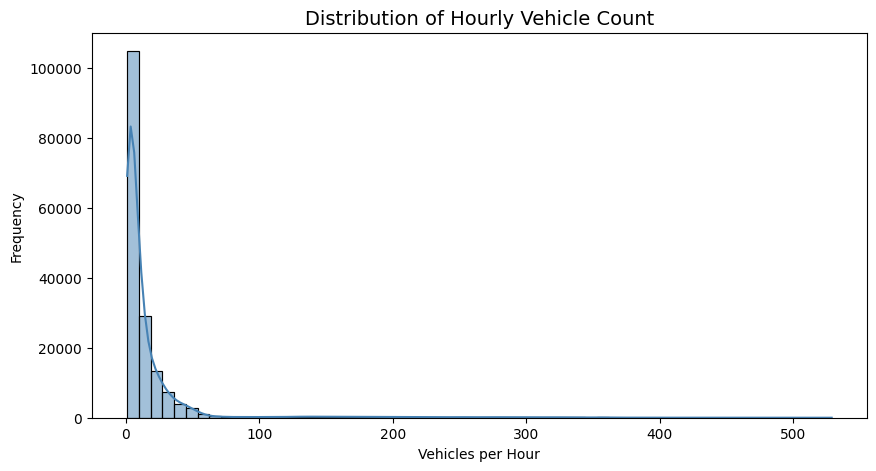

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_parking_hourly['vehicles_count'], bins=60, kde=True, color='steelblue')
plt.title("Distribution of Hourly Vehicle Count", fontsize=14)
plt.xlabel("Vehicles per Hour")
plt.ylabel("Frequency")
plt.show()

## Average Vehicle Count by Hour of Day

Displays how the average number of vehicles varies throughout the day.
This highlights peak hours of parking activity.

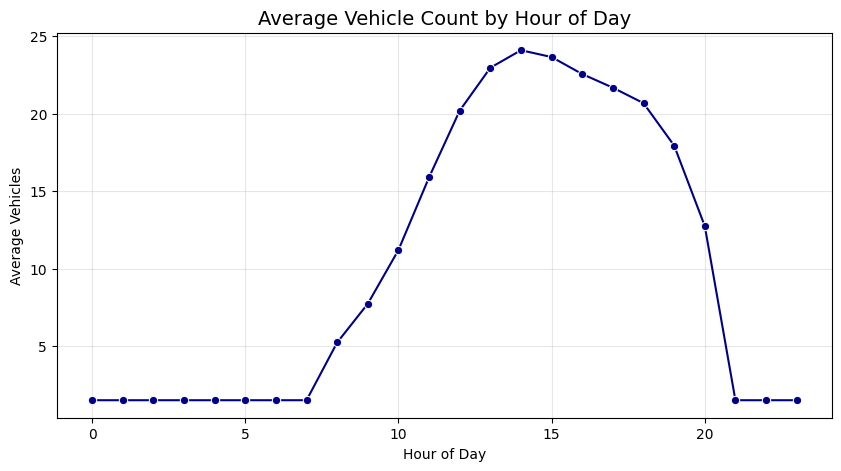

In [ ]:
df_parking_hourly['hour'] = df_parking_hourly['datetime'].dt.hour

avg_by_hour = (
    df_parking_hourly.groupby('hour')['vehicles_count']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_by_hour, x='hour', y='vehicles_count', marker='o', color='darkblue')
plt.title("Average Vehicle Count by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Average Vehicles")
plt.grid(True, alpha=0.3)
plt.show()


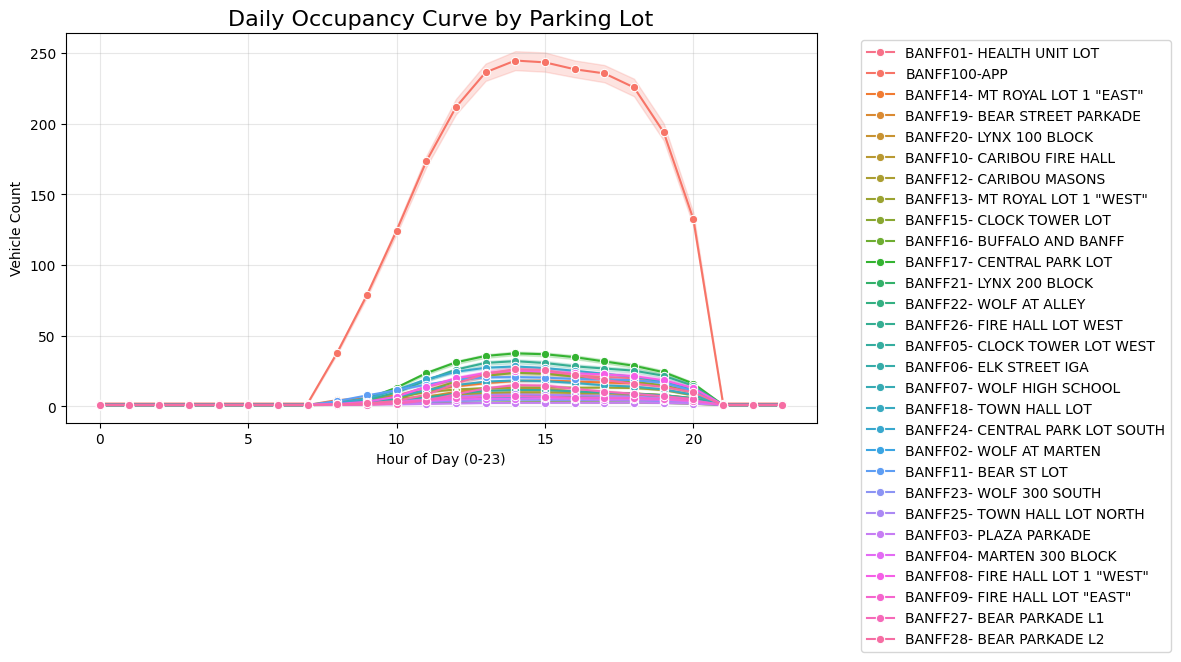

In [ ]:
plt.figure(figsize=(12, 6))

# We use the original dataframe directly (skipping the manual groupby step).
# Seaborn will automatically calculate the mean AND draw confidence intervals (shadows).
sns.lineplot(
    data=df_parking_hourly,
    x='hour',
    y='vehicles_count',
    hue='unit',
    marker='o'
)

plt.title("Daily Occupancy Curve by Parking Lot", fontsize=16)
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Vehicle Count")

# Moves the legend outside the plot area to avoid overlapping data
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

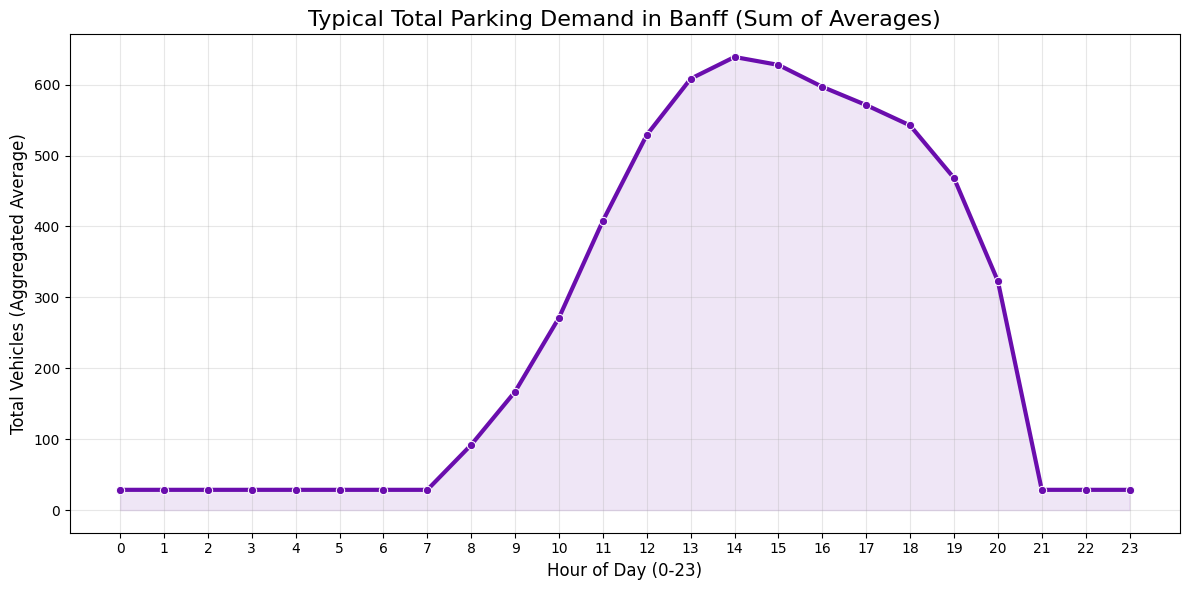

In [ ]:
# Compute the average occupancy of EACH parking lot separately for each hour
# (Example: "Typical occupancy of Lot A at 10am" + "Typical occupancy of Lot B at 10am")
lot_averages = df_parking_hourly.groupby(['hour', 'unit'])['vehicles_count'].mean().reset_index()

# Sum those per-lot averages to get the total city-wide average demand
total_avg_demand = lot_averages.groupby('hour')['vehicles_count'].sum().reset_index()

# --- PLOTTING ---
plt.figure(figsize=(12, 6))

# Draw the main aggregated line
sns.lineplot(
    data=total_avg_demand,
    x='hour',
    y='vehicles_count',
    color='#6a0dad',  # A strong purple tone to represent the total
    marker='o',
    linewidth=3
)

# Fill the area under the curve to give a sense of volume
plt.fill_between(
    total_avg_demand['hour'],
    total_avg_demand['vehicles_count'],
    color='#6a0dad',
    alpha=0.1
)

plt.title("Typical Total Parking Demand in Banff (Sum of Averages)", fontsize=16)
plt.xlabel("Hour of Day (0-23)", fontsize=12)
plt.ylabel("Total Vehicles (Aggregated Average)", fontsize=12)
plt.xticks(range(0, 24))  # Show all hours on the x-axis
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


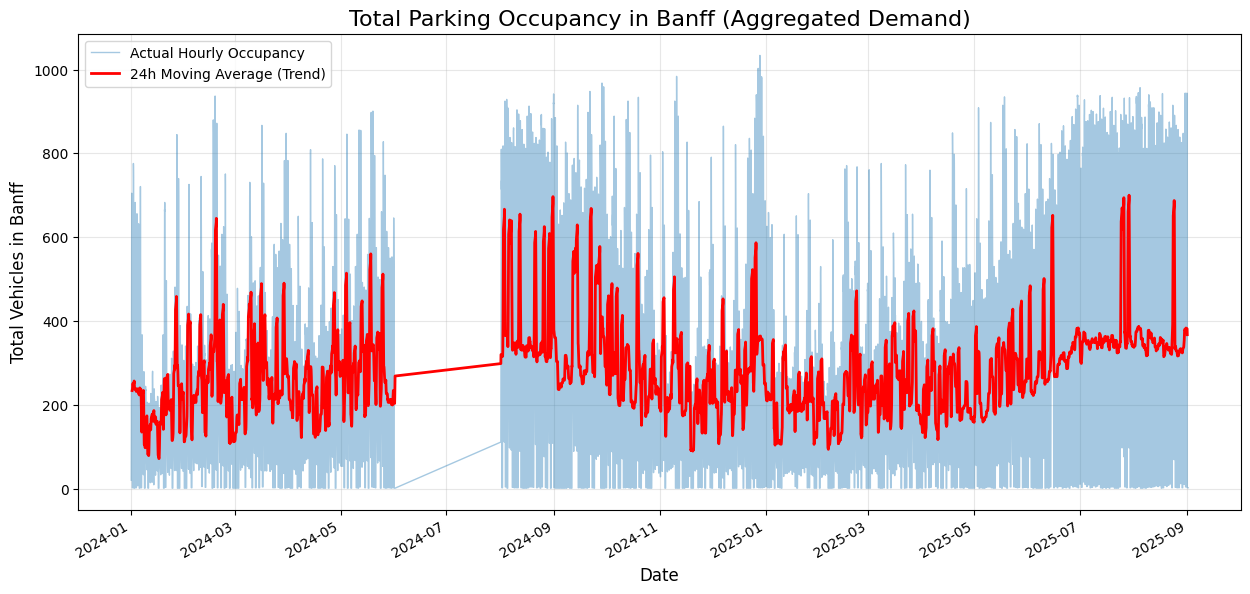

In [ ]:
# 1. Aggregation: Sum all parking lots for each hour
# This creates your final target variable (Y)
total_occupancy_series = (
    df_parking_hourly
    .groupby('datetime')['vehicles_count']
    .sum()
    .reset_index()
    .rename(columns={'vehicles_count': 'total_vehicles'})
)

# 2. Plot Configuration
plt.figure(figsize=(15, 7))

# A. Actual Data (Blue line with hourly noise)
sns.lineplot(
    data=total_occupancy_series,
    x='datetime',
    y='total_vehicles',
    label='Actual Hourly Occupancy',
    color='#1f77b4',  # Standard blue color
    alpha=0.4,        # Slight transparency to reduce visual saturation
    linewidth=1
)

# B. Smoothed Trend (24-hour Moving Average) - Optional but very useful
# This simulates the "average occupancy of the day" to reveal macro-level trends
total_occupancy_series['rolling_24h'] = total_occupancy_series['total_vehicles'].rolling(window=24, center=True).mean()

sns.lineplot(
    data=total_occupancy_series,
    x='datetime',
    y='rolling_24h',
    label='24h Moving Average (Trend)',
    color='red',
    linewidth=2
)

# 3. Labels and Styling
plt.title("Total Parking Occupancy in Banff (Aggregated Demand)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Vehicles in Banff", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

# Format date on the x-axis so it's easier to read (especially if covering many months)
plt.gcf().autofmt_xdate()

plt.show()


## Average Occupancy by Day of Week

Shows average hourly occupancy per day of the week, allowing comparison between weekdays and weekends.

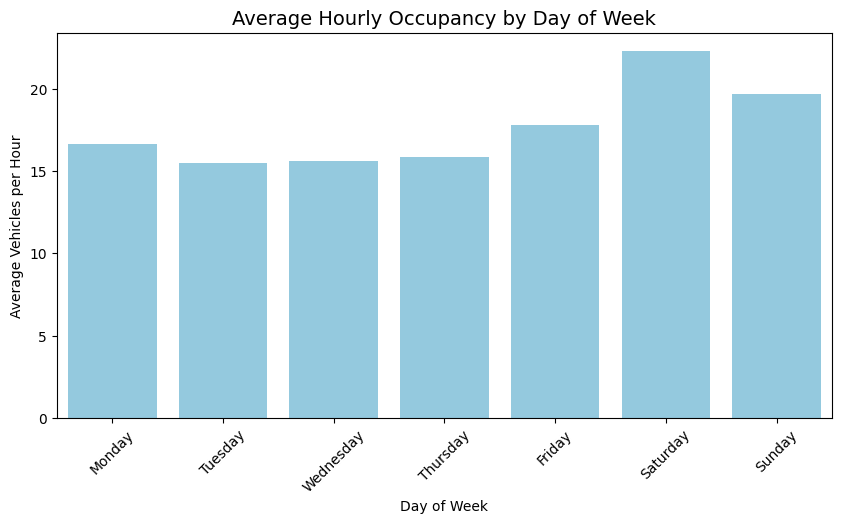

In [ ]:
df_parking_hourly['day_of_week'] = df_parking_hourly['datetime'].dt.day_name()

avg_by_day = (
    df_parking_hourly.groupby('day_of_week')['vehicles_count']
    .mean()
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=avg_by_day, x='day_of_week', y='vehicles_count', color='skyblue')
plt.title("Average Hourly Occupancy by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Average Vehicles per Hour")
plt.xticks(rotation=45)
plt.show()

## Payment Method Distribution

Visualizes the total proportion of each payment type: Pay by Phone, Bank Card, and Cash.

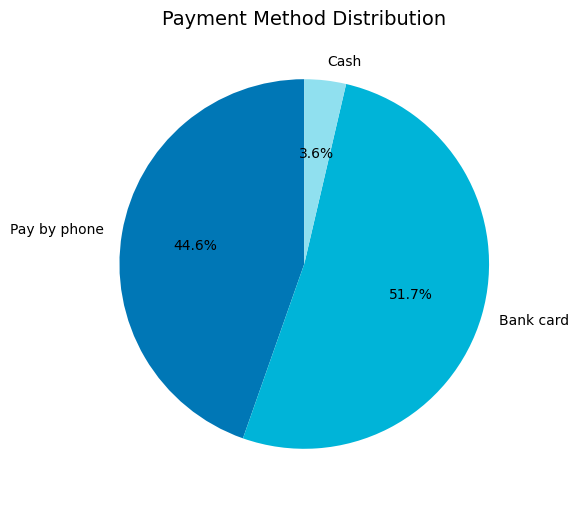

In [ ]:
payment_totals = {
    'Pay by phone': df_parking_hourly['pay_phone_count'].sum(),
    'Bank card': df_parking_hourly['pay_card_count'].sum(),
    'Cash': df_parking_hourly['pay_cash_count'].sum()
}

plt.figure(figsize=(6,6))
plt.pie(payment_totals.values(), labels=payment_totals.keys(),
        autopct='%1.1f%%', startangle=90, colors=['#0077b6','#00b4d8','#90e0ef'])
plt.title("Payment Method Distribution", fontsize=14)
plt.show()

## Relationship Between Vehicle Count and Total Amount

A scatter plot that examines whether higher vehicle counts correspond to higher revenue.
It helps assess the relationship between parking volume and income.

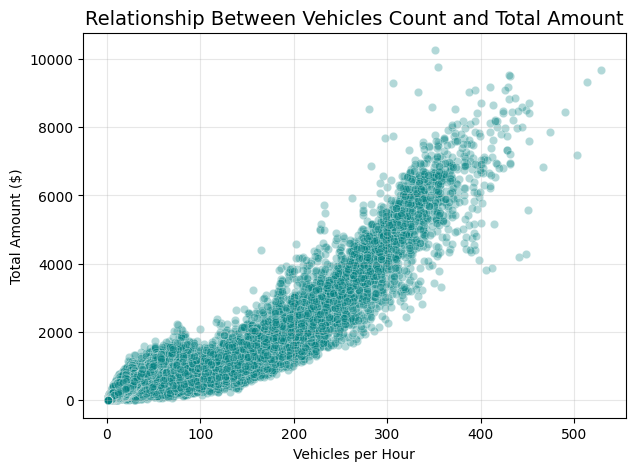

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_parking_hourly,
    x='vehicles_count', y='total_amount',
    alpha=0.3, color='teal'
)
plt.title("Relationship Between Vehicles Count and Total Amount", fontsize=14)
plt.xlabel("Vehicles per Hour")
plt.ylabel("Total Amount ($)")
plt.grid(alpha=0.3)
plt.show()

## Average Revenue per Vehicle by Hour

Displays how much revenue is generated per vehicle on average across different hours of the day.
Useful for identifying high-value time slots.

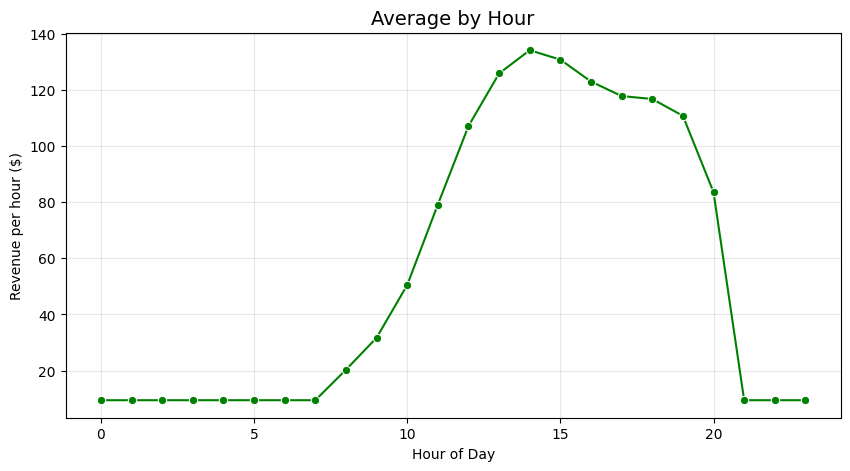

In [ ]:
avg_revenue_hour = (
    df_parking_hourly.groupby('hour')['revenue_generated']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_revenue_hour, x='hour', y='revenue_generated',
             marker='o', color='green')
plt.title("Average by Hour", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Revenue per hour ($)")
plt.grid(alpha=0.3)
plt.show()

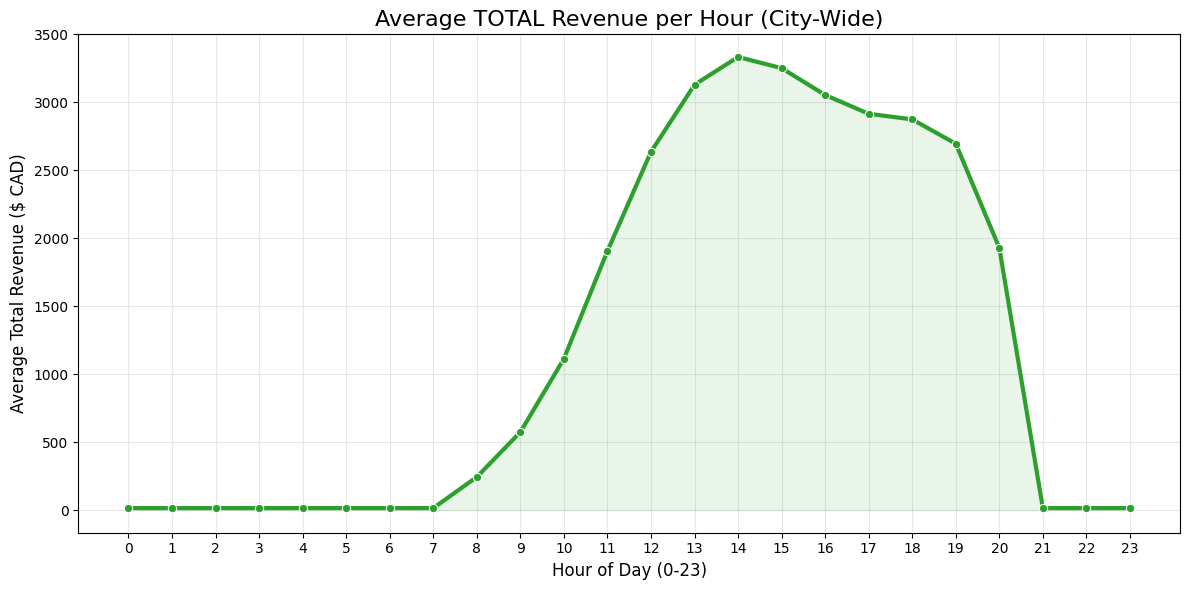

In [ ]:
# 1. First, sum the revenue from ALL parking lots for each specific date/hour
# This gives us the "Total City Revenue" for every hour in the dataset.
total_revenue_per_timestamp = (
    df_parking_hourly
    .groupby('datetime')['revenue_generated']
    .sum()
    .reset_index()
)

# 2. Extract the hour (0–23)
total_revenue_per_timestamp['hour'] = total_revenue_per_timestamp['datetime'].dt.hour

# 3. Compute the historical average revenue for each hour of the day
avg_total_revenue = (
    total_revenue_per_timestamp
    .groupby('hour')['revenue_generated']
    .mean()
    .reset_index()
)

# --- PLOTTING ---
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=avg_total_revenue,
    x='hour',
    y='revenue_generated',
    marker='o',
    color='#2ca02c',  # Green "money" color
    linewidth=3
)

# Green fill to give a financial-volume visual effect
plt.fill_between(
    avg_total_revenue['hour'],
    avg_total_revenue['revenue_generated'],
    color='#2ca02c',
    alpha=0.1
)

plt.title("Average TOTAL Revenue per Hour (City-Wide)", fontsize=16)
plt.xlabel("Hour of Day (0-23)", fontsize=12)
plt.ylabel("Average Total Revenue ($ CAD)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()


## Correlation Heatmap of Numeric Features

Displays correlations between all numeric features to uncover relationships among occupancy, revenue, and transaction behavior.

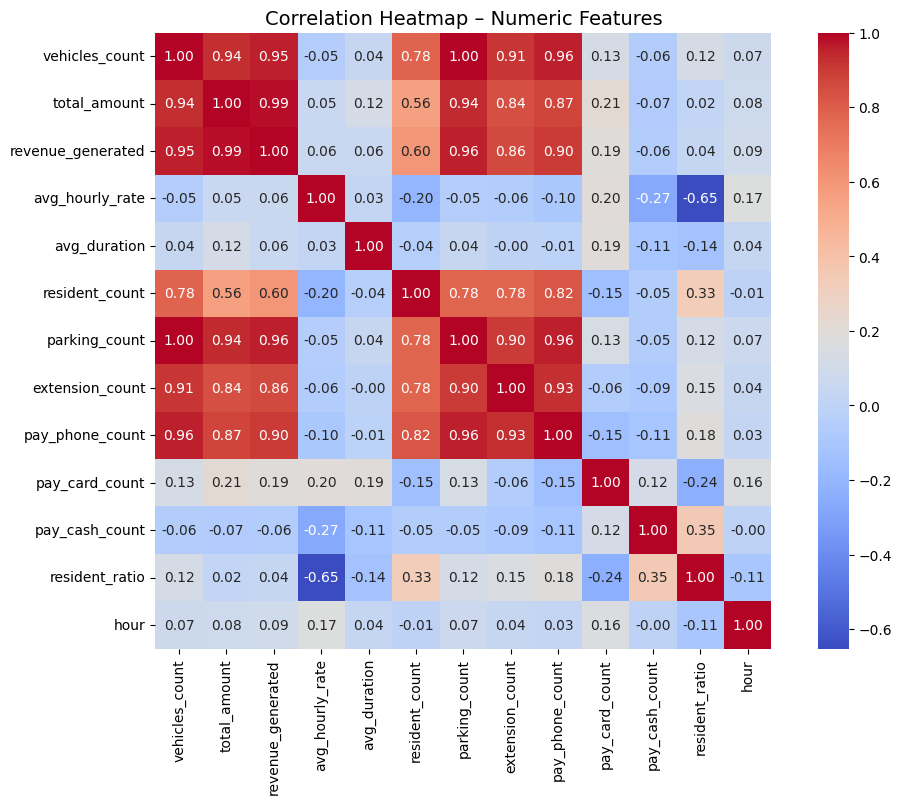

In [ ]:
# Select only numeric columns
numeric_cols = df_parking_hourly.select_dtypes(include=['number'])

# Compute correlation matrix safely
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap – Numeric Features", fontsize=14)
plt.show()

## Compute correlation between parking lots

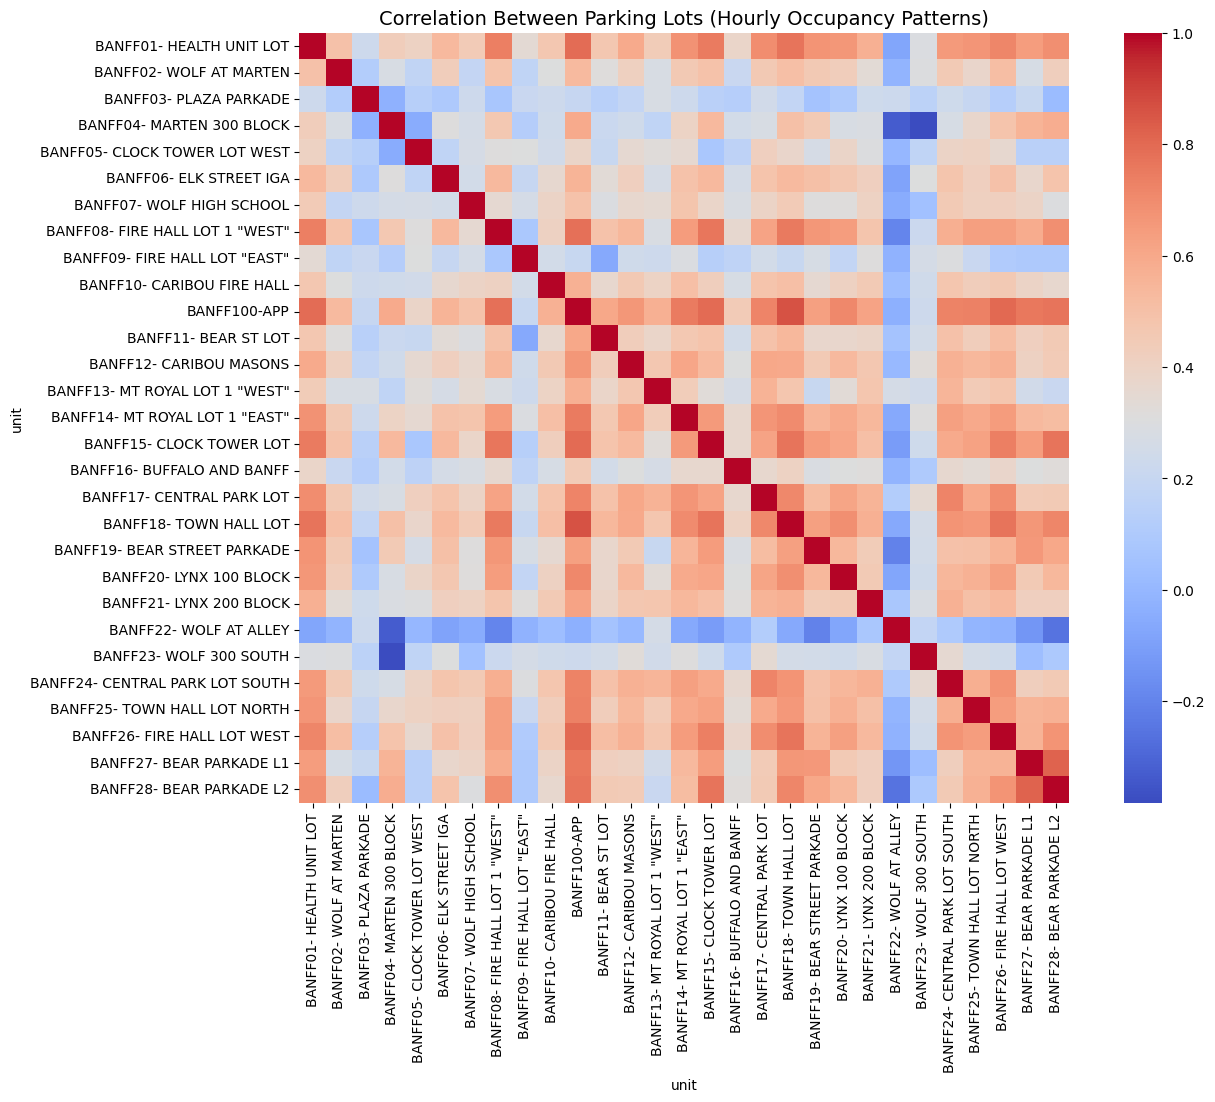

In [ ]:
# Pivot table: datetime as index, units as columns
pivot_units = (
    df_parking_hourly.pivot_table(
        index='datetime',
        columns='unit',
        values='vehicles_count',
        aggfunc='mean'
    )
)

unit_corr = pivot_units.corr(method='pearson')

plt.figure(figsize=(14, 10))
sns.heatmap(unit_corr, cmap='coolwarm', annot=False, square=True)
plt.title("Correlation Between Parking Lots (Hourly Occupancy Patterns)", fontsize=14)
plt.show()

Show top correlated lots per unit

In [ ]:
for unit in unit_corr.columns:
    top_related = unit_corr[unit].sort_values(ascending=False)[1:4]
    print(f"\nTop correlations for {unit}:")
    print(top_related.round(2))


Top correlations for BANFF01- HEALTH UNIT LOT:
unit
BANFF100-APP                0.79
BANFF18- TOWN HALL LOT      0.77
BANFF15- CLOCK TOWER LOT    0.75
Name: BANFF01- HEALTH UNIT LOT, dtype: float64

Top correlations for BANFF02- WOLF AT MARTEN:
unit
BANFF100-APP                   0.53
BANFF26- FIRE HALL LOT WEST    0.51
BANFF18- TOWN HALL LOT         0.50
Name: BANFF02- WOLF AT MARTEN, dtype: float64

Top correlations for BANFF03- PLAZA PARKADE:
unit
BANFF13- MT ROYAL LOT 1 "WEST"    0.28
BANFF17- CENTRAL PARK LOT         0.25
BANFF21- LYNX 200 BLOCK           0.24
Name: BANFF03- PLAZA PARKADE, dtype: float64

Top correlations for BANFF04- MARTEN 300 BLOCK:
unit
BANFF100-APP                0.59
BANFF28- BEAR PARKADE L2    0.58
BANFF27- BEAR PARKADE L1    0.56
Name: BANFF04- MARTEN 300 BLOCK, dtype: float64

Top correlations for BANFF05- CLOCK TOWER LOT WEST:
unit
BANFF17- CENTRAL PARK LOT       0.42
BANFF25- TOWN HALL LOT NORTH    0.40
BANFF01- HEALTH UNIT LOT        0.40
Name: BANFF0

## Visualize correlation network

A correlation analysis was performed among the 29 parking lots to identify similarities in their hourly occupancy patterns.
Using a graph generated with NetworkX, each parking lot was represented as a node, and connections were drawn when the correlation between their occupancy levels exceeded 0.7.
The resulting network made it possible to identify groups of parking lots with synchronized behavior, suggesting geographic or functional areas with similar demand, as well as independent lots with unique usage patterns.

Found 54 strong correlations (> 0.7) between lots.


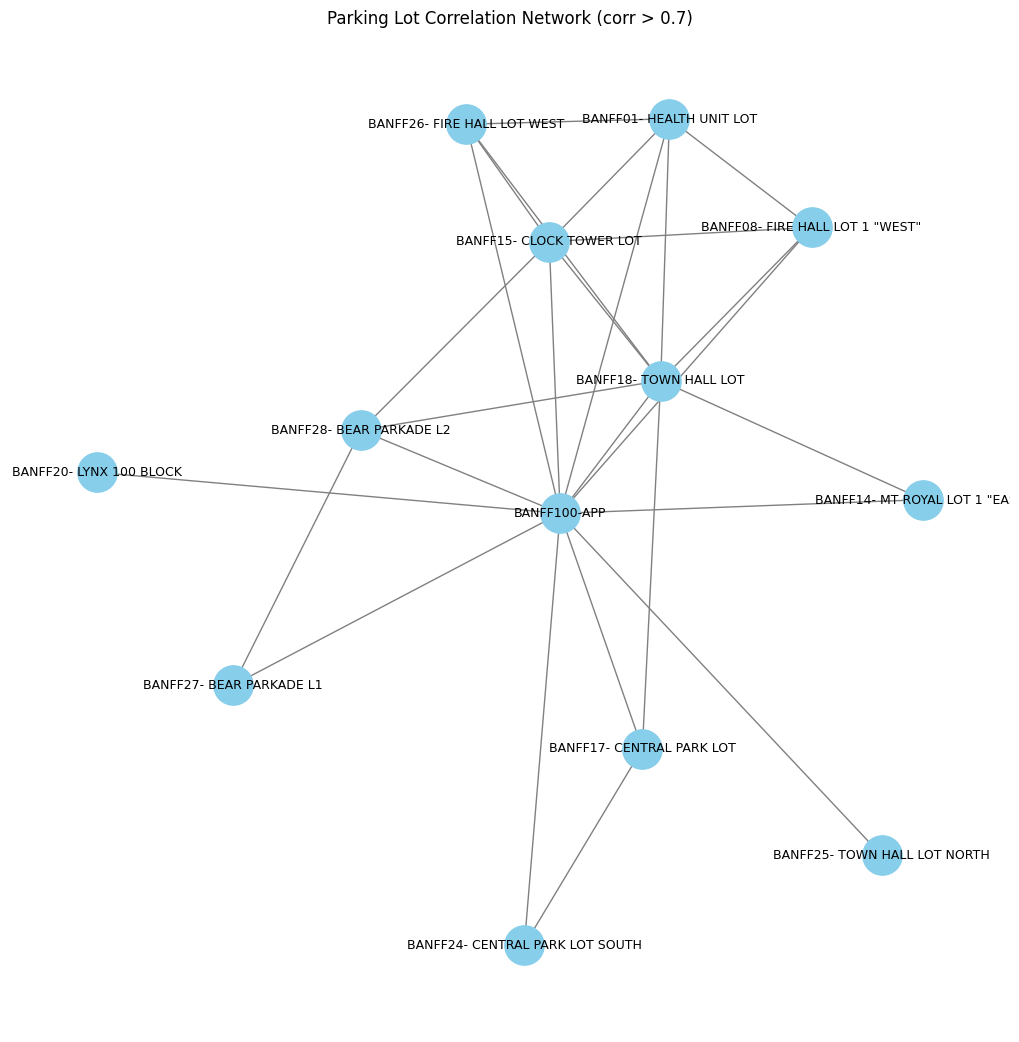

In [ ]:
import networkx as nx

# Ensure correlation matrix has unique axis names
unit_corr.index.name = 'unit_1'
unit_corr.columns.name = 'unit_2'

# Flatten correlation matrix into pairs
strong_pairs = (
    unit_corr.stack()
    .reset_index(name='corr')
    .query("unit_1 != unit_2 and corr > 0.7")
)

print(f"Found {strong_pairs.shape[0]} strong correlations (> 0.7) between lots.")

# Build network graph
G = nx.from_pandas_edgelist(strong_pairs, 'unit_1', 'unit_2', edge_attr='corr')

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.4, iterations=20, seed=42)
nx.draw(
    G, pos,
    with_labels=True, node_size=800, node_color='skyblue',
    edge_color='gray', font_size=9
)
plt.title("Parking Lot Correlation Network (corr > 0.7)")
plt.show()


## Correlations greater than 0.7 for each parking lot

In [ ]:
# Display correlations greater than 0.7 for each parking lot
threshold = 0.7

for unit in unit_corr.columns:
    # Select only correlated lots above threshold (excluding self-correlation = 1.0)
    strong_corrs = unit_corr[unit][(unit_corr[unit] > threshold) & (unit_corr[unit] < 1.0)]

    if not strong_corrs.empty:
        print(f"\n🔹 Strong correlations for {unit} (corr > {threshold}):")
        print(strong_corrs.round(2).sort_values(ascending=False))
    else:
        print(f"\nX No strong correlations (>{threshold}) found for {unit}.")



🔹 Strong correlations for BANFF01- HEALTH UNIT LOT (corr > 0.7):
unit_1
BANFF100-APP                       0.79
BANFF18- TOWN HALL LOT             0.77
BANFF15- CLOCK TOWER LOT           0.75
BANFF08- FIRE HALL LOT 1 "WEST"    0.74
BANFF26- FIRE HALL LOT WEST        0.71
Name: BANFF01- HEALTH UNIT LOT, dtype: float64

X No strong correlations (>0.7) found for BANFF02- WOLF AT MARTEN.

X No strong correlations (>0.7) found for BANFF03- PLAZA PARKADE.

X No strong correlations (>0.7) found for BANFF04- MARTEN 300 BLOCK.

X No strong correlations (>0.7) found for BANFF05- CLOCK TOWER LOT WEST.

X No strong correlations (>0.7) found for BANFF06- ELK STREET IGA.

X No strong correlations (>0.7) found for BANFF07- WOLF HIGH SCHOOL.

🔹 Strong correlations for BANFF08- FIRE HALL LOT 1 "WEST" (corr > 0.7):
unit_1
BANFF100-APP                0.78
BANFF15- CLOCK TOWER LOT    0.77
BANFF18- TOWN HALL LOT      0.76
BANFF01- HEALTH UNIT LOT    0.74
Name: BANFF08- FIRE HALL LOT 1 "WEST", dtype: float

# Save Final DataFrame to CSV

In [86]:
def save_csv(df, name):
    """
    Saves a DataFrame to a CSV file and downloads it to your computer.
    """

    # Ensure .csv extension
    if not name.lower().endswith(".csv"):
        name = name + ".csv"

    # Save CSV
    df.to_csv(name, index=False, encoding="utf-8")

    # Confirmation message
    print(f"✅ DataFrame successfully saved as '{name}'")
    print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}\n")

    # Optional: Attempt to download in Colab
    try:
        from google.colab import files
        files.download(name)
        print("📥 File downloaded automatically (Google Colab).")
    except ImportError:
        print("📂 Not running in Google Colab — file saved locally.")

In [89]:
save_csv(df_parking_hourly, "df_parking_hourly")

✅ DataFrame successfully saved as 'df_parking_hourly.csv'
Rows: 168,863 | Columns: 14



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 File downloaded automatically (Google Colab).


In [87]:
save_csv(df_parking_hourly_residents, "df_parking_hourly_residents")

✅ DataFrame successfully saved as 'df_parking_hourly_residents.csv'
Rows: 51,456 | Columns: 12



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 File downloaded automatically (Google Colab).


In [96]:
save_csv(df_parking_hourly_visitors, "df_parking_hourly_visitors")

✅ DataFrame successfully saved as 'df_parking_hourly_visitors.csv'
Rows: 164,389 | Columns: 12



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 File downloaded automatically (Google Colab).
